# Playground

In [38]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("./code")

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader

from dataset import *
from plots import *
from models import *

## Metadata Summary

In [40]:
metadata = load_metadata()

In [41]:
metadata.head()

,Unnamed: 0,Multi_Cell_Image_Id,Multi_Cell_Image_Name,Single_Cell_Image_Id,Single_Cell_Image_Name,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration,moa
0,0,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
1,1,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
2,2,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,2,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
3,3,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,3,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO
4,4,433,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,4,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,0,1,Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3...,Week10_40111,Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5...,Week10_40111,Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA...,Week10_40111,Week10_40111,B02,1,DMSO,0.0,DMSO


In [42]:
metadata.shape

(488396, 19)

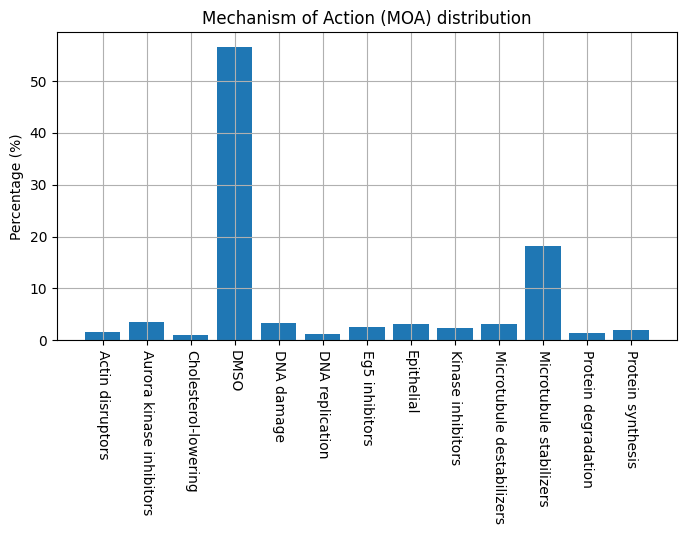

In [43]:
plot_MOA_distribution(metadata)

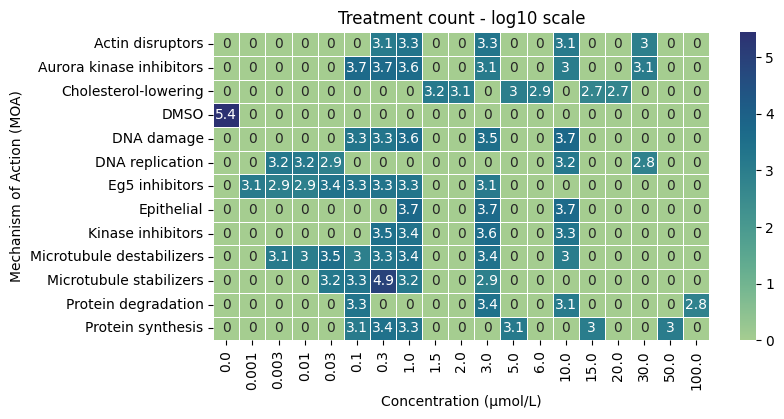

In [44]:
plot_treatment_heatmap(metadata)

## Small - Subset of Dataset

In [52]:
small_metadata = metadata[:4000]
images = load_images_from_metadata(small_metadata)
print("{} images".format(images.shape[0]))

4000 images


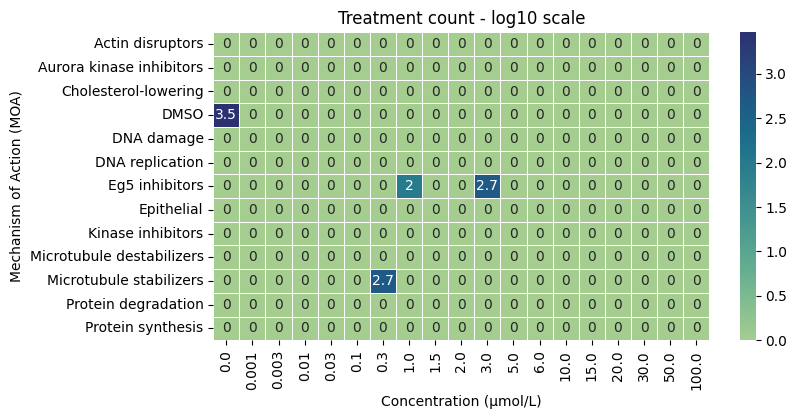

In [53]:
plot_treatment_heatmap(tiny_metadata)

## Tiny - Subset of Dataset

In [54]:
tiny_metadata = metadata[metadata["Multi_Cell_Image_Name"] == "Week10_200907_F02_s1_w14631241C-4FA2-4BC9-8693-D7D268CAEE82"]
#tiny_metadata = metadata[metadata["Multi_Cell_Image_Name"] == "B02_s1_w16F89C55C-7808-4136-82E4-E066F8E3CB10"]
images = load_images_from_metadata(tiny_metadata)
print("{} images".format(images.shape[0]))

40 images


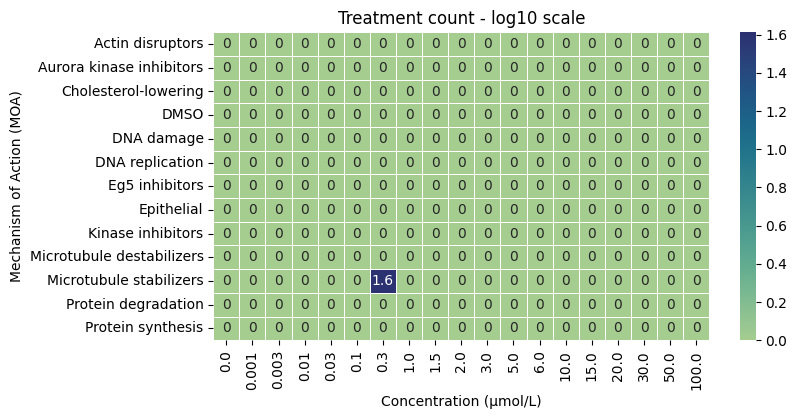

In [9]:
plot_treatment_heatmap(tiny_metadata)

In [10]:
images = normalize_channel_wise(images)
img1 = images[0]

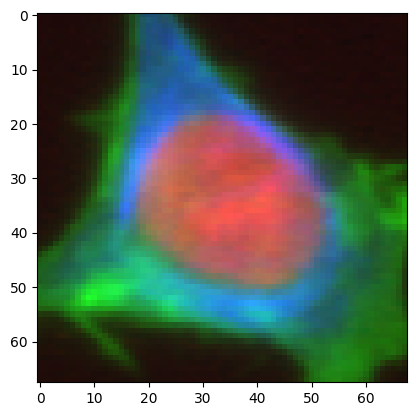

In [11]:
plot_image(img1)

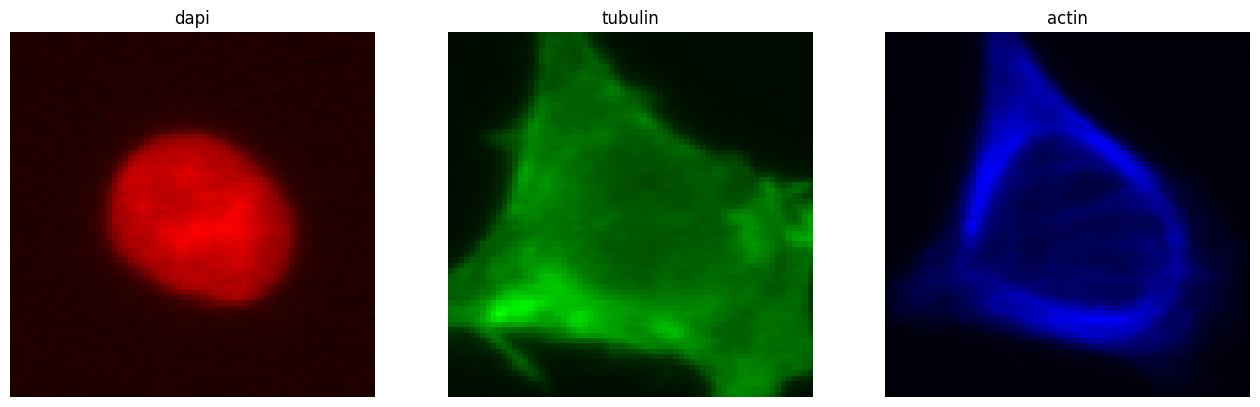

In [12]:
plot_channels(img1)

## Models

In [13]:
images = normalized_to_zscore(images)

In [35]:
cropped_images = view_cropped_images(images)
sampled_images = train(cropped_images)

02:08:07 - INFO: Using device: cpu
02:08:07 - INFO: Starting epoch 0:
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:28<00:00,  1.44s/it, MSE=0.715]
02:08:36 - INFO: Starting epoch 1:
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.52s/it, MSE=0.182]
02:09:06 - INFO: Starting epoch 2:
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:29<00:00,  1.49s/it, MSE=0.138]
02:09:36 - INFO: Starting epoch 3:
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:34<00:00,  1.72s/it, MSE=0.359]
02:10:10 - INFO: Starting epoch 4:
100%|█████████████████████████████████████████████████████████████████████████████████████

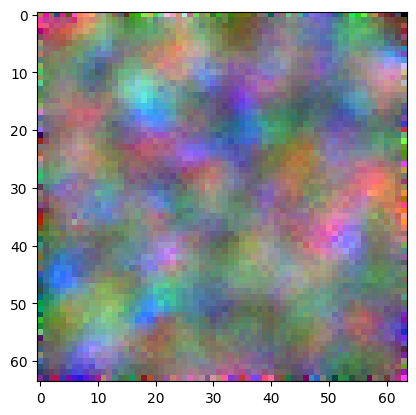

In [36]:
plot_image(sampled_images[0])

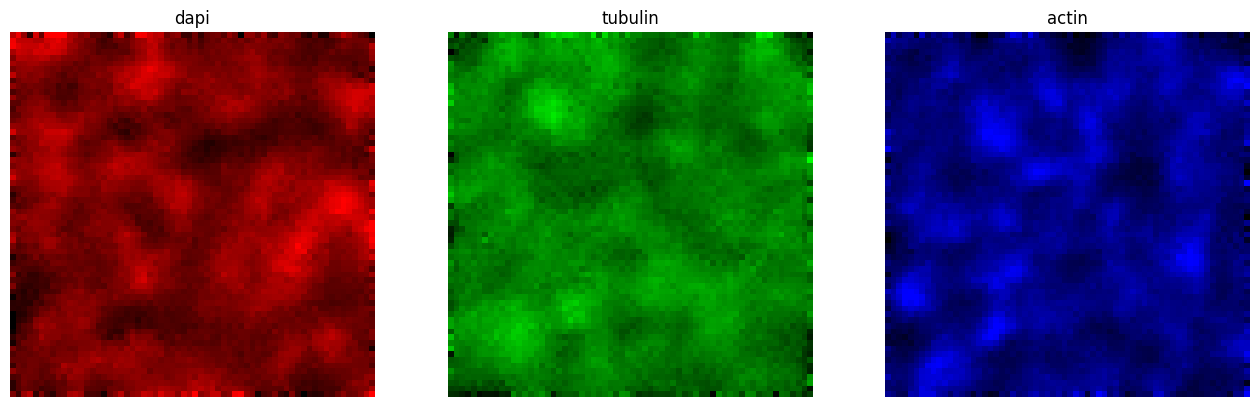

In [37]:
plot_channels(sampled_images[0])